<a href="https://colab.research.google.com/github/julianovale/simulacao_python/blob/master/0002_compartilhamento_bicicletas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simulando compartilhamento de bicicletas

Caso:

Há um bicicletário em cada universidade (Olin e Wellesley), cada um com capacidade para 12 biclicetas. Há, no total, 12 bicicletas compartilhadas entre as universidades.

A cada 2 minutos, um estudante toma uma bicicleta em Olin e vai para Wellesley. A cada 3 minutos, um estudante toma uma bicileta em Wellesley e vai para Olin.

Vamos simular os dois bicicletários e o movimento de bikes entre eles.


## Instalando e importando as bibliotecas necessárias

In [44]:
! pip install modsimpy

In [45]:
! pip install pint

In [46]:
from modsim import *

## Estado inicial

In [47]:
bikeshare = State(olin = 10, wellesley = 2) # State é da MODSIM Library

In [48]:
bikeshare.olin

10

In [49]:
bikeshare.wellesley

2

In [50]:
bikeshare

,values
olin,10
wellesley,2


## Assumindo novos valores

In [51]:
bikeshare.olin = 9
bikeshare.wellesley = 3

In [52]:
bikeshare

,values
olin,9
wellesley,3


## Atualizando valores

In [53]:
bikeshare.olin -= 1
bikeshare.wellesley += 1

In [54]:
bikeshare

,values
olin,8
wellesley,4


## Criando função para atualizar valores

In [55]:
def bike_to_wellesley():
  bikeshare.olin -= 1
  bikeshare.wellesley += 1

In [56]:
def bike_to_olin():
  bikeshare.wellesley -= 1
  bikeshare.olin += 1

In [57]:
bike_to_wellesley()
bikeshare

,values
olin,7
wellesley,5


In [58]:
bike_to_olin()
bikeshare

,values
olin,8
wellesley,4


## Imprimindo valores

In [59]:

bikeshare.wellesley
bikeshare.olin
# se eu rodar esses comandos os dois serão rodados, mas será exibido só o valor do último, então, usando o print(), isso se resolve  

8

In [60]:
print(bikeshare.wellesley)
print(bikeshare.olin)

4
8


In [61]:
print(bikeshare.wellesley, bikeshare.olin)

4 8


In [62]:
def bike_to_wellesley():
  print('movendo uma bike para Wellesley')
  bikeshare.olin -= 1
  bikeshare.wellesley += 1

In [63]:
def bike_to_olin():
  print('movendo uma bike para Olin')
  bikeshare.wellesley -= 1
  bikeshare.olin += 1

In [64]:
bike_to_olin()

movendo uma bike para Olin


In [65]:
bike_to_wellesley()

movendo uma bike para Wellesley


In [66]:
bikeshare

,values
olin,8
wellesley,4


## If

In [67]:
flip(0.7) # MODSIM library: gera aleatoriamente "True" ou "False", neste caso: (flip) com 70% de chance de "True"; ou, (flop) para 30% de "False".


True

In [68]:
# Um exemplo de uso
if flip(0.5):
  print("cara")
else:
  print("coroa")

coroa


Veja:

Se um estudante sai de Olin para Wellesley a cada 2 minutos, a probabilidade de em um minuto particular partir um estudante nesse sentido é de 0.5; e sai um estudante de Wellesley para Olin a cada 3 minutos, então a probabilidade num dado minuto de sair um estudante é de 0.33. Vamos modelar isso:

In [69]:
if flip(0.5):
  bike_to_wellesley()

movendo uma bike para Wellesley


In [70]:
if flip(0.33):
  bike_to_olin()

movendo uma bike para Olin


Vamos modelar o que pode ocorrer num minuto particular (um passo do modelo):

In [71]:
def step():
  if flip(0.5):
    bike_to_wellesley()
  if flip(0.33):
    bike_to_olin()

In [72]:
step()

movendo uma bike para Wellesley


In [73]:
bikeshare

,values
olin,7
wellesley,5


## Parâmetros e argumentos

In [74]:
def step(p1, p2): # p1 e p2 são parâmetros da função
  if flip(p1):
    bike_to_wellesley()
  
  if flip(p2):
    bike_to_olin()

In [75]:
step(0.5, 0.33) # 0.5 e 0.33 são argumentos

movendo uma bike para Olin


## For

In [76]:
for i in range(4):
  bike_to_wellesley()

movendo uma bike para Wellesley
movendo uma bike para Wellesley
movendo uma bike para Wellesley
movendo uma bike para Wellesley


## Time series

In [77]:
results = TimeSeries() # TimeSeries é da biblioteca MODSIM

In [78]:
results[0] = bikeshare.olin

In [79]:
for i in range(10):
  step(0.3, 0.2)
  results[i] = bikeshare.olin

movendo uma bike para Wellesley
movendo uma bike para Olin
movendo uma bike para Wellesley
movendo uma bike para Wellesley


In [80]:
results

,values
0,4
1,3
2,3
3,2
4,2
5,2
6,2
7,2
8,2
9,2


In [81]:
results.mean()

2.4

## Plotting

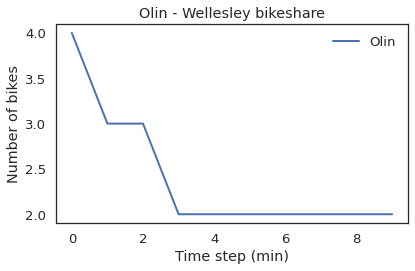

In [82]:
plot(results, label = "Olin")
decorate(title = "Olin - Wellesley bikeshare",
         xlabel = "Time step (min)",
         ylabel = "Number of bikes")